Reading wine Dataset

In [131]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [132]:
wine_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', \
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315',\
              'Proline']
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names = wine_names)
wine_df = pd.DataFrame(wine_data)
wine_df.Class = wine_df.Class - 1

wine_classes_df = wine_df.Class
wine_df = wine_df.drop(columns="Class")
print(wine_df.head())

   Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
2    13.16        2.36  2.67               18.6        101           2.80   
3    14.37        1.95  2.50               16.8        113           3.85   
4    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280/OD315  Proline  
0         3.92     1065  
1         

The dataset doesn't contain any NA values.

In [133]:
wine_df.isnull().sum()

Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64

The dataset doesn't contain any duplicate values.


In [134]:
wine_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool

Scaling Dataset

In [135]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

wine_df = pd.DataFrame(scaler.fit_transform(wine_df), columns=wine_df.columns)

Visualizing the dataset

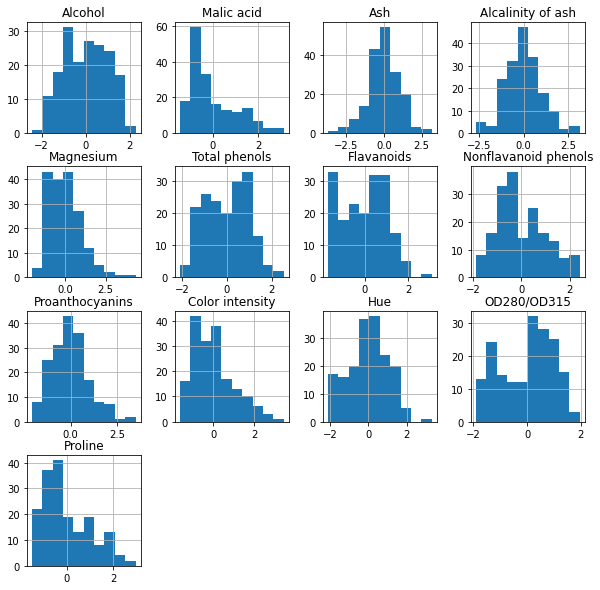

In [136]:
wine_df.hist(figsize =(10,10))
plt.show()

Preparing Data

In [137]:
X_train, X_test, y_train, y_test = train_test_split(wine_df, wine_classes_df, test_size=0.33, random_state=42)

Calculating WCSS (within-cluster sums of squares) for elbow method

Text(0, 0.5, 'WCSS')

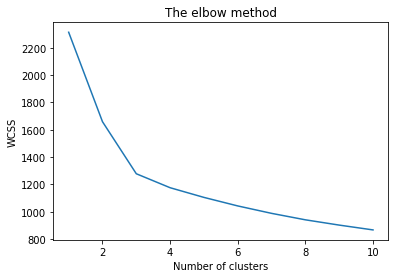

In [138]:
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(wine_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

We see that the elbow method gives number of clusters=3 as optimal clusters.

In [139]:
n_clusters=3
model = KMeans(n_clusters, random_state=42)
model.fit(wine_df)

cluster_labels = model.predict(wine_df)
centers = model.cluster_centers_

kmeans = pd.DataFrame(cluster_labels)
wine_kmeans_df=wine_df.copy()
wine_kmeans_df.insert((wine_kmeans_df.shape[1]),'kmeans',kmeans)

wine_kmeans_df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline,kmeans
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1


Principal Component Analysis (PCA) to apply dimensionality reduction to 2 columns

In [140]:
from sklearn.decomposition import PCA

pca = PCA(2)    # for 2D analysis
reduced_wine_df = pd.DataFrame(pca.fit_transform(wine_df), columns=['PC1', 'PC2'])
reduced_wine_df.head()

,PC1,PC2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


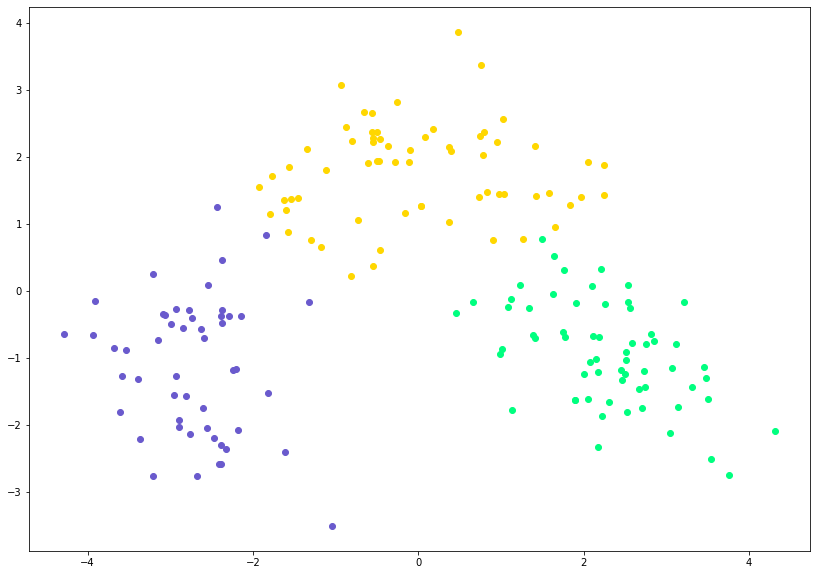

In [141]:
reduced_wine_df['cluster'] = cluster_labels

plt.figure(figsize=(14, 10))

plt.scatter(reduced_wine_df[reduced_wine_df['cluster'] == 0].loc[:, 'PC1'], reduced_wine_df[reduced_wine_df['cluster'] == 0].loc[:, 'PC2'], color='slateblue')
plt.scatter(reduced_wine_df[reduced_wine_df['cluster'] == 1].loc[:, 'PC1'], reduced_wine_df[reduced_wine_df['cluster'] == 1].loc[:, 'PC2'], color='springgreen')
plt.scatter(reduced_wine_df[reduced_wine_df['cluster'] == 2].loc[:, 'PC1'], reduced_wine_df[reduced_wine_df['cluster'] == 2].loc[:, 'PC2'], color='gold')

# plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], color='black', marker='x', s=300)

plt.show()

Training

In [142]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(256, 256), max_iter=500)

model.fit(X_train, y_train)
print(f"Model Accuracy: {model.score(X_test, y_test)}")

Model Accuracy: 1.0
